In [7]:
# Install (only if needed, matplotlib usually pre-installed on Colab)
!pip install matplotlib

# Imports
import random
import re
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


In [8]:
class MarkovChain:
    def __init__(self, order=1):
        self.order = order
        self.model = defaultdict(list)

    def train(self, text):
        """Train the Markov chain on the given text"""
        # Clean up text to normalize spacing
        words = re.findall(r'\b\w+\b', text.lower())

        if len(words) < self.order:
            raise ValueError("Text too short for the chosen order.")

        # Build tuples of (history) -> next_word
        for i in range(len(words) - self.order):
            history = tuple(words[i:i + self.order])
            next_word = words[i + self.order]
            self.model[history].append(next_word)

    def generate(self, length=50, seed=None):
        """Generate text of specified length starting from seed history"""
        if not self.model:
            raise ValueError("Model is empty. Train it first.")

        # Start from a random state if no seed
        history = None
        if seed:
            seed_words = tuple(seed.lower().split())
            if seed_words in self.model:
                history = seed_words
            else:
                print(f"Seed '{seed}' not found, picking randomly.")

        if history is None:
            history = random.choice(list(self.model.keys()))

        output = list(history)

        for _ in range(length - self.order):
            next_words = self.model.get(history)
            if not next_words:
                break
            next_word = random.choice(next_words)
            output.append(next_word)
            history = tuple(output[-self.order:])

        return ' '.join(output)


In [9]:
# Example text corpus (can replace with large text from file)
sample_text = """
In the heart of the forest, the old trees whispered stories of ancient times.
Birds sang melodies unknown to human ears, and the river carried secrets down to the valley.
Every morning, sunlight broke through the dense canopy, painting golden patterns on the mossy ground.
"""

# Create and train the Markov chain
mc = MarkovChain(order=2)
mc.train(sample_text)

# Print a snippet of the model's transitions
for k, v in list(mc.model.items())[:5]:
    print(f"{k} -> {v}")


('in', 'the') -> ['heart']
('the', 'heart') -> ['of']
('heart', 'of') -> ['the']
('of', 'the') -> ['forest']
('the', 'forest') -> ['the']


In [10]:
# Try generating from a specific seed
print("\nGenerated Text starting from 'the forest':\n")
print(mc.generate(length=30, seed='the forest'))

# Or purely random start
print("\nGenerated Text with random start:\n")
print(mc.generate(length=30))



Generated Text starting from 'the forest':

the forest the old trees whispered stories of ancient times birds sang melodies unknown to human ears and the river carried secrets down to the valley every morning sunlight broke

Generated Text with random start:

on the mossy ground


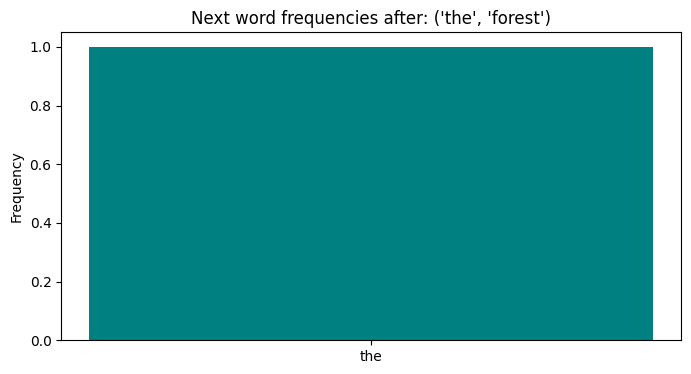

In [11]:
# Pick a history to analyze
history_to_check = ('the', 'forest')

# Count frequencies
counts = Counter(mc.model.get(history_to_check, []))

# Plot
if counts:
    plt.figure(figsize=(8,4))
    plt.bar(counts.keys(), counts.values(), color='teal')
    plt.title(f"Next word frequencies after: {history_to_check}")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"No transitions found for {history_to_check}")
